---

# Just Operation Policies of Guadalajara’s Aquifer under Drought Conditions

**Master Thesis - Ariel Goldin Marcovich**  
TU Delft  
August 2024

---

## Optimization Formulation

This notebook is designed to explore different possible sets of objectives for the optimization and assess their capacity to provide high-performing policies through an a-posteriori filtering approach.

---





In [2]:
from ema_workbench import (Model, RealParameter, ScalarOutcome,
                           MultiprocessingEvaluator, ema_logging,
                           Constant, Scenario, Constraint,optimize)

import random
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

from AMG_function import AMG_model_function, AMG_model_function_int
from functions_data import full_dataframe
from AMG_drought_indicator import get_drought_state

#testing the model function
outcomes = AMG_model_function(chapala_flow= 7.1, calderon_lared_flow= 0, pozos_flow= 2.2, toluquilla_flow= 0.4, 
                aqp1_PP2_to_PP3=0.2, aqp2_PP3_to_Pozos=-0.71, aqp3_Pozos_to_Toluquilla=-0.6, aqp4_Toluquilla_to_PP1=-0.6,
                rounding_outcomes=2,
                rounding_levers=2)
print(outcomes)


{'demand_PP1': 2.932923333333333, 'demand_PP2': 0.7571686458333333, 'demand_PP3': 0.9435108680555555, 'demand_Toluquilla': 0.782294375, 'demand_Pozos': 1.2014250347222222, 'supplied_PP1': 2.6693019600000003, 'supplied_PP2': 0.6854705, 'supplied_PP3': 0.8775000000000001, 'supplied_Toluquilla': 0.68757754, 'supplied_Pozos': 1.0439000000000003, 'total_supplied': 5.963750000000001, 'supplied_demand_PP1': 0.9101165140127543, 'supplied_demand_PP2': 0.9053075609669191, 'supplied_demand_PP3': 0.9300369817768028, 'supplied_demand_Toluquilla': 0.8789243051888237, 'supplied_demand_Pozos': 0.8688848407769005, 'supplied_demand_deficit_PP1': 0.08988348598724571, 'supplied_demand_deficit_PP2': 0.09469243903308089, 'supplied_demand_deficit_PP3': 0.06996301822319717, 'supplied_demand_deficit_Toluquilla': 0.1210756948111763, 'supplied_demand_deficit_Pozos': 0.13111515922309946, 'supply_percapita_PP1': 145.84716808037962, 'supply_percapita_PP2': 132.98958577064803, 'supply_percapita_PP3': 145.25167492715

## 1. Open Exploration of Ad-Hoc Formulations

Section usefull for conducting experiments to find candidate formulations.

In [3]:
#Problem formulation
performance_outcomes = {"supplied_demand_deficit":True,
                          "supplied_demand":False,
                          "supply_percapita":False}

justice_outcomes = {"supplied_demand_GINI":True,
                      "supply_percapita_GINI":True,
                      "supply_percapita_average":True,
                      "ZAs_below_142":False,
                      "ZAs_below_128":False,
                      "ZAs_below_100":False,
                      "ZAs_below_50":False}

other_outcomes = {"energy_costs":True}


#Model Parameters
n_nfe = 50000
epsilon = 0.04
seed = 1

#Scenario setting
drougth_multiplier = 0.5
scenario_drought_multiplier = {"name":f"drought_multiplier_{drougth_multiplier}",'chapala_flow' : 6.9*drougth_multiplier, 'calderon_lared_flow' : 1*drougth_multiplier, 'pozos_flow' : 2.3*drougth_multiplier, 'toluquilla_flow' : 0.5*drougth_multiplier}

representative_scenarios_df = pd.read_csv("results/representative_scenarios.csv", index_col=0)

scenario_name = "chapala_incident"
scenario = representative_scenarios_df.loc[scenario_name,:].to_dict()


all_outcomes = {**performance_outcomes, **justice_outcomes, **other_outcomes}
current_formulation = [outcome for outcome, active in all_outcomes.items() if active]

experiment_name = "-".join(current_formulation)+f" {scenario['name']}-{n_nfe}-{epsilon}-{seed}"
print(experiment_name)

supplied_demand_deficit-supplied_demand_GINI-supply_percapita_GINI-supply_percapita_average-energy_costs chapala_incident-50000-0.04-1


In [21]:
from AMG_optimization import run_optimization, run_optimization_int




# Model Parameters
n_nfe = 50000
epsilon = 0.04
seed = 1
flows = ["chapala_flow", "calderon_lared_flow", "pozos_flow", "toluquilla_flow"]


'''results  = run_optimization_old(experiment_name=experiment_name, 
                                justice_outcomes=justice_outcomes, performance_outcomes=performance_outcomes, other_outcomes=other_outcomes,
                 n_nfe = n_nfe, epsilon = epsilon, seed = seed,
                 scenario=scenario, model_function= AMG_model_function_old,
                 restriction = True)'''

results  = run_optimization(experiment_name=experiment_name, 
                 outcomes= all_outcomes,
                 n_nfe = n_nfe, epsilon = epsilon, seed = seed,
                 scenario=scenario, scenario_name=scenario_name,model_function= AMG_model_function,
                 restriction = True)

results.head()

Scenario({'chapala_flow': 1.8, 'calderon_lared_flow': 1, 'pozos_flow': 2.2, 'toluquilla_flow': 0.4})
['supplied_demand_deficit', 'supplied_demand_GINI', 'supply_percapita_GINI', 'supply_percapita_average', 'energy_costs']


[MainProcess/INFO] pool started with 8 workers
50537it [26:08, 32.22it/s]                                                     
[MainProcess/INFO] optimization completed, found 2972 solutions
[MainProcess/INFO] terminating pool


,aqp1_PP2_to_PP3,aqp2_PP3_to_Pozos,aqp3_Pozos_to_Toluquilla,aqp4_Toluquilla_to_PP1,supply_percapita_average,supplied_demand_deficit_PP1,supplied_demand_deficit_PP2,supplied_demand_deficit_PP3,supplied_demand_deficit_Toluquilla,supplied_demand_deficit_Pozos,supplied_demand_GINI,supply_percapita_GINI,energy_costs,experiment_name,seed,duration,scenario
0,-0.836513,-0.466553,-0.109232,0.128894,0.611761,0.706989,0.008843,0.311057,0.717010,0.264922,0.248517,0.238678,0.385298,supplied_demand_deficit-supplied_demand_GINI-s...,1,1570.0,chapala_incident
1,-0.691768,0.025318,-0.075514,0.453602,0.552599,0.635027,0.133102,0.550197,0.958790,0.017050,0.352631,0.339430,0.311550,supplied_demand_deficit-supplied_demand_GINI-s...,1,1570.0,chapala_incident
2,-0.743456,-0.612625,-0.171066,-0.204405,0.650954,0.780855,0.088730,0.146316,0.491452,0.310497,0.217386,0.213759,0.432888,supplied_demand_deficit-supplied_demand_GINI-s...,1,1570.0,chapala_incident
3,-0.746375,-0.481774,-0.171066,-0.201062,0.645585,0.780114,0.086224,0.238472,0.494230,0.239703,0.207960,0.204170,0.400069,supplied_demand_deficit-supplied_demand_GINI-s...,1,1570.0,chapala_incident
4,-0.642313,0.002859,-0.108394,-0.385807,0.649917,0.821058,0.175557,0.500655,0.288654,0.011412,0.242847,0.230610,0.284843,supplied_demand_deficit-supplied_demand_GINI-s...,1,1570.0,chapala_incident


## 2. Run Optimizations with Different Formulations

Optimization for three candidate policies across three representative scenarios.

In [4]:
formulations = pd.read_excel("2_formulation\optimization_parameters.xlsx", index_col="experiment_name")
formulations.head()

,supplied_demand_deficit,supplied_demand,supply_percapita,supplied_demand_GINI,supply_percapita_GINI,average_supply_percapita,ZAs_below_142,ZAs_below_128,ZAs_below_100,ZAs_below_50,...,epsilon,seed,scenario_name,scenario_chapala_flow,scenario_calderon_lared_flow,scenario_pozos_flow,scenario_toluquilla_flow,restriction,model_function,Rationale
experiment_name,,,,,,,,,,,,,,,,,,,,,
Supplied Demand Deficit,True,False,False,False,False,False,False,False,False,False,...,0.01,1,2020_baseline,1,1,1,1,True,AMG_model_function,NaN
"Sup. Dem. Deficit, Sup. Percap. GINI & Energy",True,False,False,False,True,False,False,False,False,False,...,0.01,1,2020_baseline,1,1,1,1,True,AMG_model_function,NaN
"Sup. Dem. Deficit, Energy & All Justice",True,False,False,True,True,True,False,False,False,False,...,0.01,1,2020_baseline,1,1,1,1,True,AMG_model_function,NaN


In [5]:
representative_scenarios_df = pd.read_csv("results/representative_scenarios.csv", index_col=0)
representative_scenarios_df.head()

,chapala_flow,calderon_lared_flow,pozos_flow,toluquilla_flow,name
2021_drought,7.1,0,2.2,0.4,2021_drought
chapala_incident,1.8,1,2.2,0.4,chapala_incident
groundwater_scarcity,6.1,1,0.7,0.2,groundwater_scarcity


In [6]:
from AMG_optimization import run_optimization

outcomes_vars =["supplied_demand_deficit","supplied_demand","supply_percapita",
        "supplied_demand_GINI","supply_percapita_GINI","average_supply_percapita",
        "ZAs_below_142","ZAs_below_128","ZAs_below_100","ZAs_below_50",
        "energy_costs"]

aqp_flows = ["aqp1_PP2_to_PP3", "aqp2_PP3_to_Pozos", "aqp3_Pozos_to_Toluquilla", "aqp4_Toluquilla_to_PP1"]

# Model Parameters
n_nfe = 50000
epsilon = 0.04
seed = 1

# Define scenario from the representative scenarios df
representative_scenarios = ["2021_drought", "chapala_incident", "groundwater_scarcity"]
representative_scenarios_df = pd.read_csv("results/representative_scenarios.csv", index_col=0)

In [14]:
for scenario_name in representative_scenarios:

    scenario = representative_scenarios_df.loc[scenario_name,:].to_dict()

    # Empty df to concat all results from the optimizations 
    full_optimization_results = pd.DataFrame()

    for experiment_name, formulation in formulations.iterrows():
        results = run_optimization(experiment_name=experiment_name, 
                                            outcomes = formulation[outcomes_vars].to_dict(),
                                            scenario=scenario,
                                            scenario_name = scenario_name,
                                            rounding_levers=3,
                                            n_nfe = n_nfe,
                                            epsilon = epsilon,
                                            seed=seed)

        

        # Remove outcomes
        results = results.loc[:,aqp_flows+["experiment_name", "scenario", "seed", "duration"]]
        full_results_df = full_dataframe(results,scenarios_in_dataframe=False, scenario = scenario)

        # Adding some information columns not usually included in the full_dataframe function
        full_results_df = pd.concat([full_results_df, results[["scenario", "seed", "duration"]]], axis = 1)
        
        full_optimization_results = pd.concat([full_results_df,full_optimization_results])



    # Change index from individual optimization runs and use it to define policies
    full_optimization_results = full_optimization_results.reset_index()
    full_optimization_results = full_optimization_results.rename(columns={"index":"policy"})


    full_optimization_results.to_csv(f"results/optimization_results_{scenario_name}_sd{seed}ep{epsilon}nfe{n_nfe}.csv",index=False)

full_optimization_results.head()


Scenario({'chapala_flow': 7.1, 'calderon_lared_flow': 0, 'pozos_flow': 2.2, 'toluquilla_flow': 0.4})
['supplied_demand_deficit']


[MainProcess/INFO] pool started with 8 workers
50215it [10:22, 80.62it/s]                                                     
[MainProcess/INFO] optimization completed, found 423 solutions
[MainProcess/INFO] terminating pool


Scenario({'chapala_flow': 7.1, 'calderon_lared_flow': 0, 'pozos_flow': 2.2, 'toluquilla_flow': 0.4})
['supplied_demand_deficit', 'supply_percapita_GINI', 'energy_costs']


[MainProcess/INFO] pool started with 8 workers
50939it [26:34, 31.95it/s]                                                     
[MainProcess/INFO] optimization completed, found 1466 solutions
[MainProcess/INFO] terminating pool


Scenario({'chapala_flow': 7.1, 'calderon_lared_flow': 0, 'pozos_flow': 2.2, 'toluquilla_flow': 0.4})
['supplied_demand_deficit', 'supplied_demand_GINI', 'supply_percapita_GINI', 'average_supply_percapita', 'energy_costs']


[MainProcess/INFO] pool started with 8 workers
50031it [54:40, 15.25it/s]                                                     
[MainProcess/INFO] optimization completed, found 1531 solutions
[MainProcess/INFO] terminating pool


Scenario({'chapala_flow': 1.8, 'calderon_lared_flow': 1, 'pozos_flow': 2.2, 'toluquilla_flow': 0.4})
['supplied_demand_deficit']


[MainProcess/INFO] pool started with 8 workers
50325it [16:45, 50.06it/s]                                                     
[MainProcess/INFO] optimization completed, found 2140 solutions
[MainProcess/INFO] terminating pool


Scenario({'chapala_flow': 1.8, 'calderon_lared_flow': 1, 'pozos_flow': 2.2, 'toluquilla_flow': 0.4})
['supplied_demand_deficit', 'supply_percapita_GINI', 'energy_costs']


[MainProcess/INFO] pool started with 8 workers
51170it [23:06, 36.90it/s]                                                     
[MainProcess/INFO] optimization completed, found 3042 solutions
[MainProcess/INFO] terminating pool


Scenario({'chapala_flow': 1.8, 'calderon_lared_flow': 1, 'pozos_flow': 2.2, 'toluquilla_flow': 0.4})
['supplied_demand_deficit', 'supplied_demand_GINI', 'supply_percapita_GINI', 'average_supply_percapita', 'energy_costs']


[MainProcess/INFO] pool started with 8 workers
51067it [28:04, 30.31it/s]                                                     
[MainProcess/INFO] optimization completed, found 3348 solutions
[MainProcess/INFO] terminating pool


Scenario({'chapala_flow': 6.1, 'calderon_lared_flow': 1, 'pozos_flow': 0.7, 'toluquilla_flow': 0.2})
['supplied_demand_deficit']


[MainProcess/INFO] pool started with 8 workers
53181it [38:56, 22.76it/s]                                                     
[MainProcess/INFO] optimization completed, found 5098 solutions
[MainProcess/INFO] terminating pool


Scenario({'chapala_flow': 6.1, 'calderon_lared_flow': 1, 'pozos_flow': 0.7, 'toluquilla_flow': 0.2})
['supplied_demand_deficit', 'supply_percapita_GINI', 'energy_costs']


[MainProcess/INFO] pool started with 8 workers
50184it [38:33, 21.69it/s]                                                     
[MainProcess/INFO] optimization completed, found 5788 solutions
[MainProcess/INFO] terminating pool


Scenario({'chapala_flow': 6.1, 'calderon_lared_flow': 1, 'pozos_flow': 0.7, 'toluquilla_flow': 0.2})
['supplied_demand_deficit', 'supplied_demand_GINI', 'supply_percapita_GINI', 'average_supply_percapita', 'energy_costs']


[MainProcess/INFO] pool started with 8 workers
50846it [51:47, 16.36it/s]                                                     
[MainProcess/INFO] optimization completed, found 5932 solutions
[MainProcess/INFO] terminating pool


,policy,aqp4_Toluquilla_to_PP1,aqp1_PP2_to_PP3,aqp2_PP3_to_Pozos,aqp3_Pozos_to_Toluquilla,demand_PP1,demand_PP2,demand_PP3,demand_Toluquilla,demand_Pozos,...,supply_percapita_GINI,supplied_demand_GINI,energy_costs,ZAs_below_142,ZAs_below_100,ZAs_below_50,experiment_name,scenario,seed,duration
0,0,-0.538267,-0.124225,-0.008376,-0.766916,2.932923,0.757169,0.943511,0.782294,1.201425,...,0.143996,0.145826,0.359446,4.0,1.0,0.0,"Sup. Dem. Deficit, Energy & All Justice",groundwater_scarcity,1,3111.0
1,1,-0.307844,0.009441,-0.030150,-0.643210,2.932923,0.757169,0.943511,0.782294,1.201425,...,0.157168,0.154367,0.247661,5.0,2.0,0.0,"Sup. Dem. Deficit, Energy & All Justice",groundwater_scarcity,1,3111.0
2,2,-0.263784,0.518232,0.200418,-0.158868,2.932923,0.757169,0.943511,0.782294,1.201425,...,0.165714,0.149532,0.285325,4.0,2.0,0.0,"Sup. Dem. Deficit, Energy & All Justice",groundwater_scarcity,1,3111.0
3,3,-0.874070,0.193141,-0.100311,-0.686719,2.932923,0.757169,0.943511,0.782294,1.201425,...,0.081679,0.077053,0.463560,4.0,1.0,0.0,"Sup. Dem. Deficit, Energy & All Justice",groundwater_scarcity,1,3111.0
4,4,-0.871172,0.429649,0.335557,-0.747414,2.932923,0.757169,0.943511,0.782294,1.201425,...,0.080916,0.081584,0.595948,5.0,1.0,0.0,"Sup. Dem. Deficit, Energy & All Justice",groundwater_scarcity,1,3111.0


## 3. Best Scores Comparaison

Once the nine optimizations have run, we can compaire the best performing policies for each aggregated objective and the compromsie solution for the most relevant tradeoff mentioned in the Workshop.

In [9]:
from functions_data import find_minmax_values

representative_scenarios = ["2021_drought", "chapala_incident", "groundwater_scarcity"]

combined_optimization_results = pd.DataFrame()
for scenario_name in representative_scenarios:
    full_optimization_results = pd.read_csv(f"results/optimization_results_{scenario_name}_sd{seed}ep{epsilon}nfe{n_nfe}.csv")
    
    '''full_optimization_results.loc[:,"supply_percapita_average"] = full_optimization_results.loc[:,"supply_percapita_average"].multiply(147)
    full_optimization_results.to_csv(f"results/optimization_results_{scenario_name}_sd{seed}ep{epsilon}nfe{n_nfe}.csv", index=False)'''
    combined_optimization_results = pd.concat([full_optimization_results,combined_optimization_results])
    
    # Finds the maximum or minimum value for each objective for each formulation
    min_max_df = find_minmax_values(full_optimization_results)
    min_max_df.to_csv(f"results/min_max_{scenario_name}_sd{seed}ep{epsilon}nfe{n_nfe}.csv" )

combined_optimization_results.to_csv(f"results/optimization_results_sd{seed}ep{epsilon}nfe{n_nfe}.csv", index=False)

min_max_df.head()

,supplied_demand_deficit_PP1,supplied_demand_deficit_PP2,supplied_demand_deficit_PP3,supplied_demand_deficit_Toluquilla,supplied_demand_deficit_Pozos,supplied_demand_GINI,supply_percapita_GINI,ZAs_below_142,ZAs_below_100,ZAs_below_50,...,supplied_demand_Toluquilla,supplied_demand_Pozos,supply_percapita_average,supply_percapita_PP1,supply_percapita_PP2,supply_percapita_PP3,supply_percapita_Toluquilla,supply_percapita_Pozos,comp_energy_costs,comp_supply_percapita_average
formulation,,,,,,,,,,,,,,,,,,,,,
"Sup. Dem. Deficit, Energy & All Justice",0.000002,2.672901e-05,0.000085,0.000050,0.000025,0.009899,0.004538,2.0,0.0,0.0,...,1.199520,1.042511,123.061913,161.462876,163.771365,176.600971,177.230418,152.712308,0.139654,114.946973
"Sup. Dem. Deficit, Sup. Percap. GINI & Energy",0.000012,2.925411e-07,0.000099,0.000024,0.000017,0.020485,0.011631,2.0,0.0,0.0,...,1.173710,1.074938,122.680577,161.850775,171.026451,180.490052,173.416938,157.462402,0.476040,108.133172
Supplied Demand Deficit,0.001066,7.826149e-05,0.000075,0.000005,0.000012,0.011724,0.016158,2.0,0.0,0.0,...,1.078344,1.047837,120.515101,161.482581,169.647153,186.835156,159.326544,153.492492,0.289097,96.184598


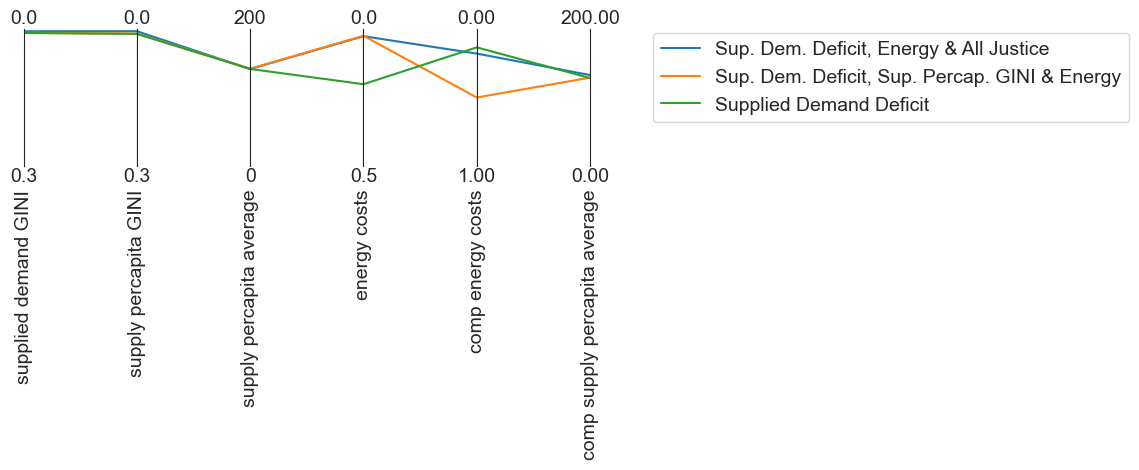

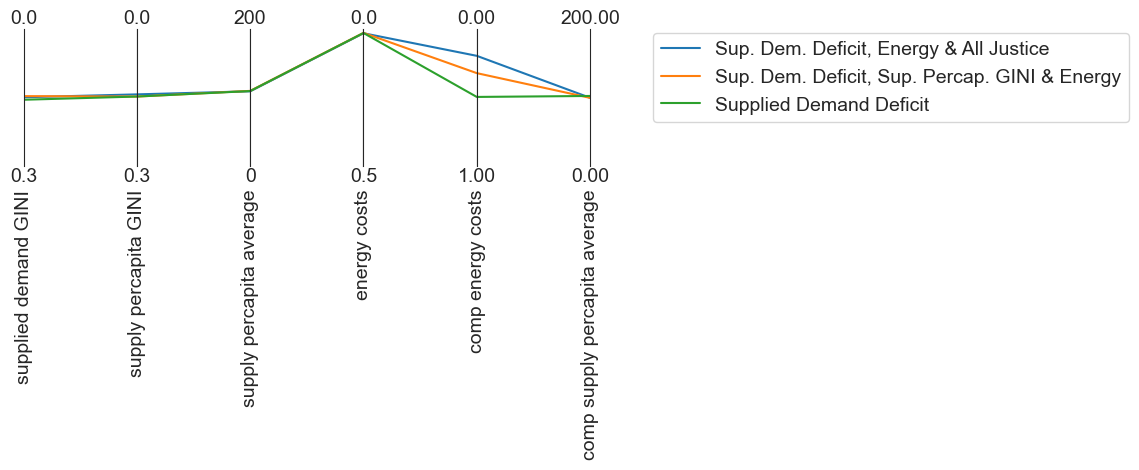

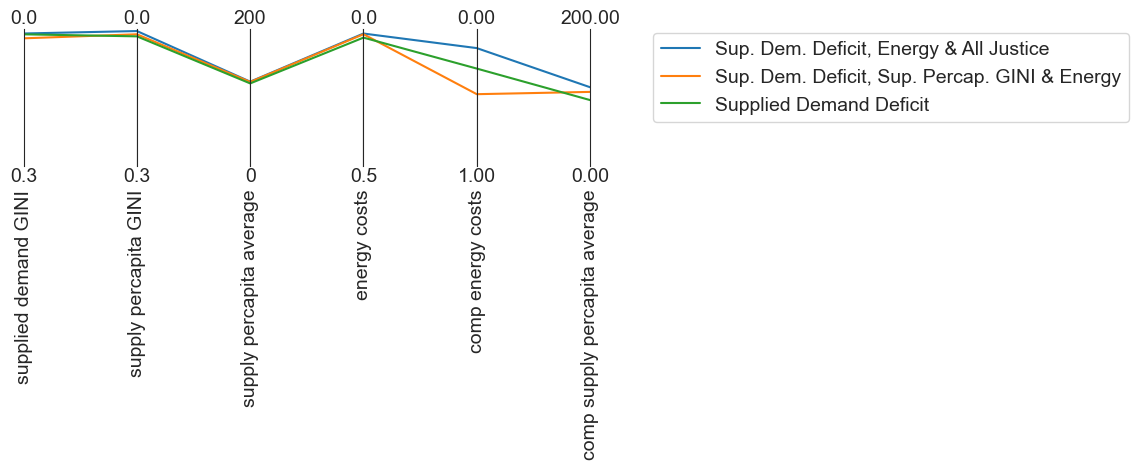

In [7]:
from ema_workbench.analysis import parcoords


representative_scenarios = ["2021_drought", "chapala_incident", "groundwater_scarcity"]

# Model Parameters
n_nfe = 50000
epsilon = 0.04
seed = 1

for scenario_name in representative_scenarios:

    data = pd.read_csv(f"results/min_max_{scenario_name}_sd{seed}ep{epsilon}nfe{n_nfe}.csv", index_col="formulation")

    limits = pd.read_csv("2_formulation/limits.csv")

    
    # Replace underscores with spaces in column names for both data and limits
    data.columns = data.columns.str.replace('_', ' ')
    limits.columns = limits.columns.str.replace('_', ' ')

    # Update the formatter dictionary to match the new column names without underscores
    formatter = {
        'supply percapita PP1': '.0f',
        'supply percapita PP2': '.0f',
        'supply percapita PP3': '.0f',
        'supply percapita Toluquilla': '.0f',
        'supply percapita Pozos': '.0f',
        'supplied demand GINI': '.1f',
        'supply percapita GINI': '.1f',
        'energy costs': '.1f',
        'comp. energy costs': '.1f',  
        'comp. supply percapita average': '.0f', 
        'supplied demand GINI': '.1f', 
        'supply percapita GINI': '.1f', 
        'supply percapita average': '.0f'
    }


    # Create parallel axes plot
    paraxes = parcoords.ParallelAxes(limits, formatter = formatter)
    colors = sns.color_palette()



    # Flip the axes for specified columns
    columns_to_flip = ["comp energy costs", "supplied demand GINI", "supply percapita GINI", "energy costs"]
    for col in columns_to_flip:
        paraxes.invert_axis(col)
    
    # Plot each row of data
    for i, (index, row) in enumerate(data.iterrows()):
        
        paraxes.plot(row.to_frame().T, label=str(index), color=colors[i])

    # Customize the plot
    
    paraxes.legend()


    # Save the figure
    plt.savefig("2_formulation/best_pols_comp_{scenario_name}_sd{seed}ep{epsilon}nfe{n_nfe}.jpg", dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()

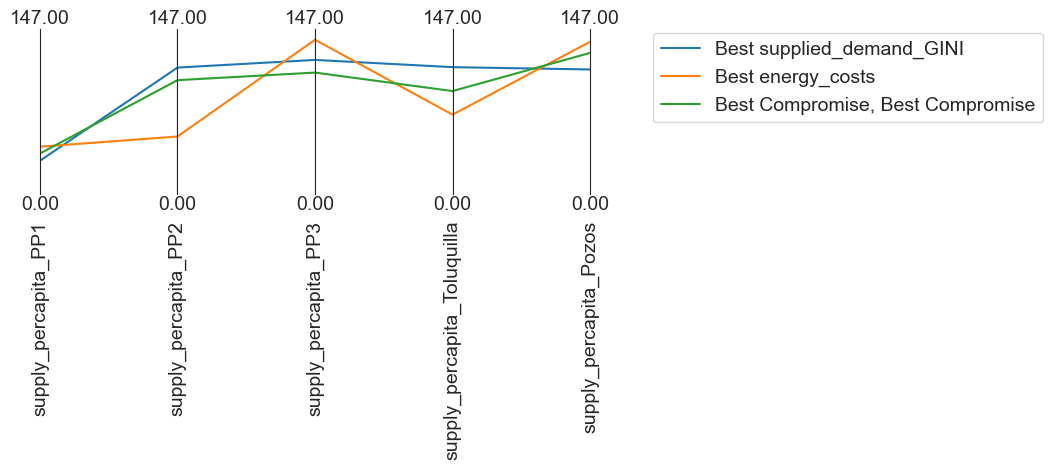

In [ ]:
import pandas as pd
from ema_workbench.analysis import parcoords
import matplotlib.pyplot as plt

# Experimentation to finetune the visualization function

def visualize_best_policies(best_policies_df, objectives_dict):
    ZA_names = ["PP1", "PP2", "PP3", "Toluquilla", "Pozos"]

    # Identify the columns that indicate best performance (ending in '_min', '_max', or '_compromise')
    objectives_min = ['supplied_demand_deficit_PP1',
                      'supplied_demand_deficit_PP2', 
                      'supplied_demand_deficit_PP3',
                      'supplied_demand_deficit_Toluquilla', 
                      'supplied_demand_deficit_Pozos',
                      "supplied_demand_GINI",
                      "supply_percapita_GINI",
                      "energy_costs"]

    objectives_max = ['supplied_demand_PP1', 
                      'supplied_demand_PP2', 
                      'supplied_demand_PP3',
                      'supplied_demand_Toluquilla', 
                      'supplied_demand_Pozos', 
                      "supply_percapita_average"]
    
    best_performance_columns = []
    for obj in objectives_dict.keys():
        if objectives_dict[obj]:
            if obj in objectives_min:
                best_performance_columns.append(f"{obj}_min")
            elif obj in objectives_max:
                best_performance_columns.append(f"{obj}_max")
            best_performance_columns.append(f"{obj}_compromise")

    # Create a dictionary for labeling the policies
    policy_labels = {
        f"{obj}_min": f"Best {obj}" for obj in objectives_dict.keys() if objectives_dict[obj] and obj in objectives_min
    }
    policy_labels.update({
        f"{obj}_max": f"Best {obj}" for obj in objectives_dict.keys() if objectives_dict[obj] and obj in objectives_max
    })
    policy_labels.update({
        f"{obj}_compromise": f"Best Compromise" for obj in objectives_dict.keys() if objectives_dict[obj]
    })

    # Filter rows where at least one of the best performance columns is True
    best_performing_policies_df = best_policies_df[best_policies_df[best_performance_columns].any(axis=1)]

    # Create a dictionary to map index to labels
    index_labels = {}
    for col, label in policy_labels.items():
        indices = best_performing_policies_df[best_performing_policies_df[col] == True].index
        for idx in indices:
            if idx in index_labels:
                index_labels[idx] += f", {label}"
            else:
                index_labels[idx] = label

    # Select the supply per capita columns for the five zones of analysis (ZA)
    supply_per_capita_columns = [
        'supply_percapita_PP1', 'supply_percapita_PP2', 'supply_percapita_PP3',
        'supply_percapita_Toluquilla', 'supply_percapita_Pozos'
    ]
    data = best_performing_policies_df[supply_per_capita_columns]

    # Get limits for parallel coordinates plot
    limits = pd.read_csv("results/limits.csv")

    # Create the parallel axes plot
    paraxes = parcoords.ParallelAxes(limits)

    # Plot each row
    colors = plt.cm.tab10.colors
    for i, (index, row) in enumerate(data.iterrows()):
        label = index_labels.get(index, str(index))
        paraxes.plot(row.to_frame().T, label=label, color=colors[i % len(colors)])

    # Add legend and show plot
    paraxes.legend()
    plt.show()

# Example usage
objectives_dict = {
    'supplied_demand_deficit_PP1': False,
    'supplied_demand_deficit_PP2': False,
    'supplied_demand_deficit_PP3': False,
    'supplied_demand_deficit_Toluquilla': False,
    'supplied_demand_deficit_Pozos': False,
    'supplied_demand_GINI': True,
    'supply_percapita_GINI': False,
    'energy_costs': True,
    'supplied_demand_PP1': False,
    'supplied_demand_PP2': False,
    'supplied_demand_PP3': False,
    'supplied_demand_Toluquilla': False,
    'supplied_demand_Pozos': False,
    'supply_percapita_average': False
}

scenario_name = "chapala_incident"
seed = 1  # Example seed value
epsilon = 0.04  # Example epsilon value
n_nfe = 20000  # Example nfe value

# Load the data from the provided CSV file
best_policies_df = pd.read_csv(f"results/best_policies_{scenario_name}_sd{seed}ep{epsilon}nfe{n_nfe}.csv")

visualize_best_policies(best_policies_df)



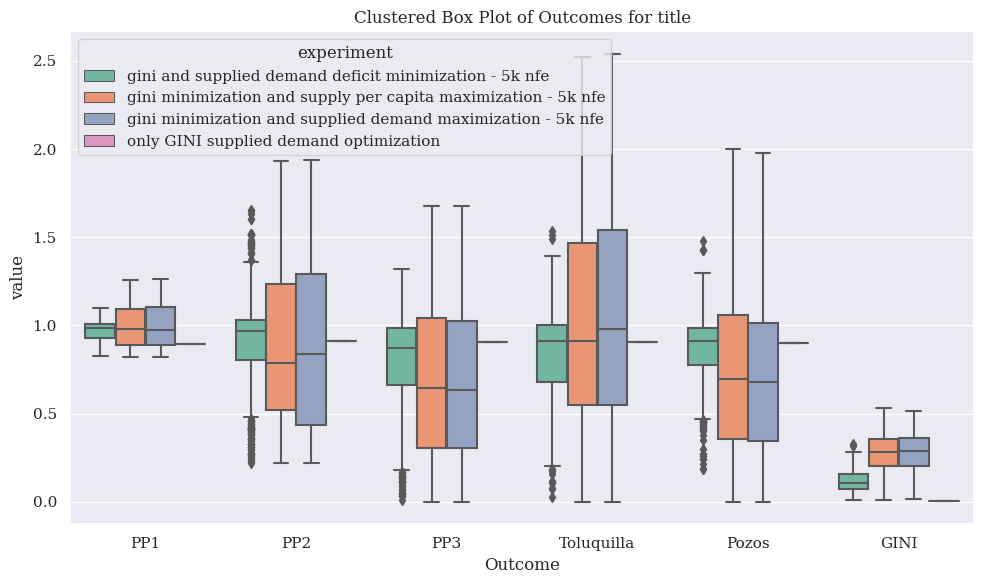